In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [14]:
analysis = scripts.Analysis()

In [15]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_5',
                          'wgt_1_.8_.7_.7_.6',
                          'subarctic_winter')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [16]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_5',
                               'wgt_1_.8_.7_.7_.6',
                               'subarctic_winter')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [17]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [18]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [19]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [20]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [21]:
fig.display_hrefanchor()

In [22]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [23]:
table_dgdgs.display_hrefanchor()

In [24]:
for g in [1, 2, 3, 4, 5]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

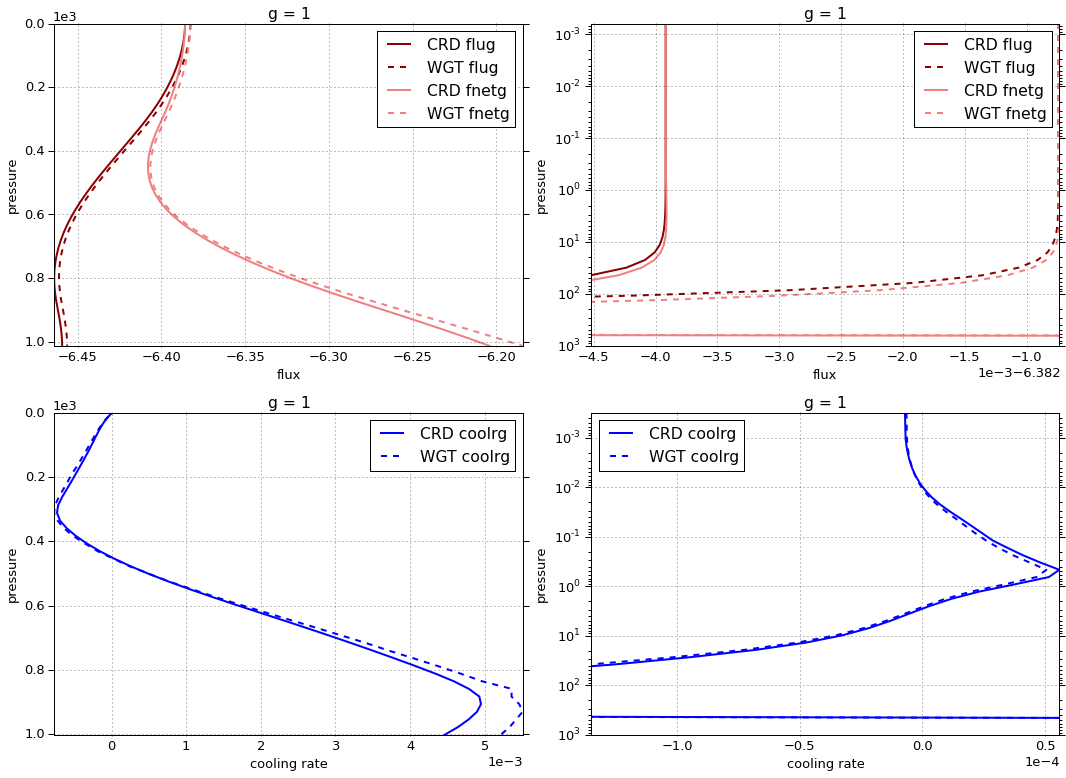

# Figure: flux, cooling rate. g-group 2

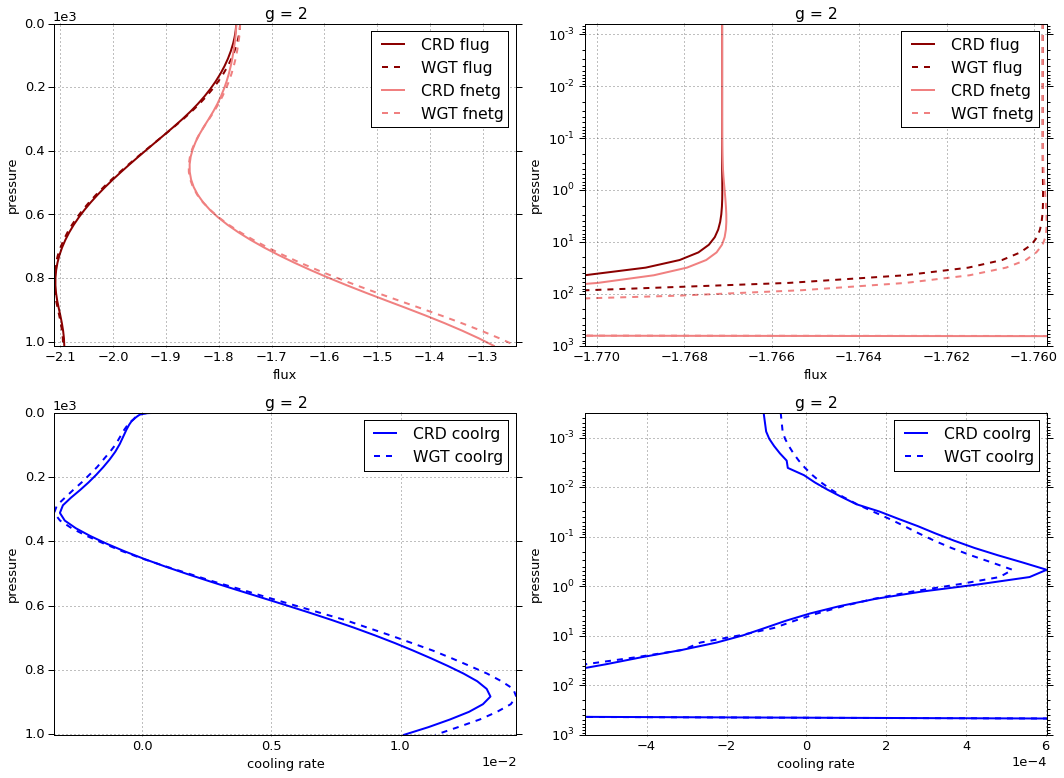

# Figure: flux, cooling rate. g-group 3

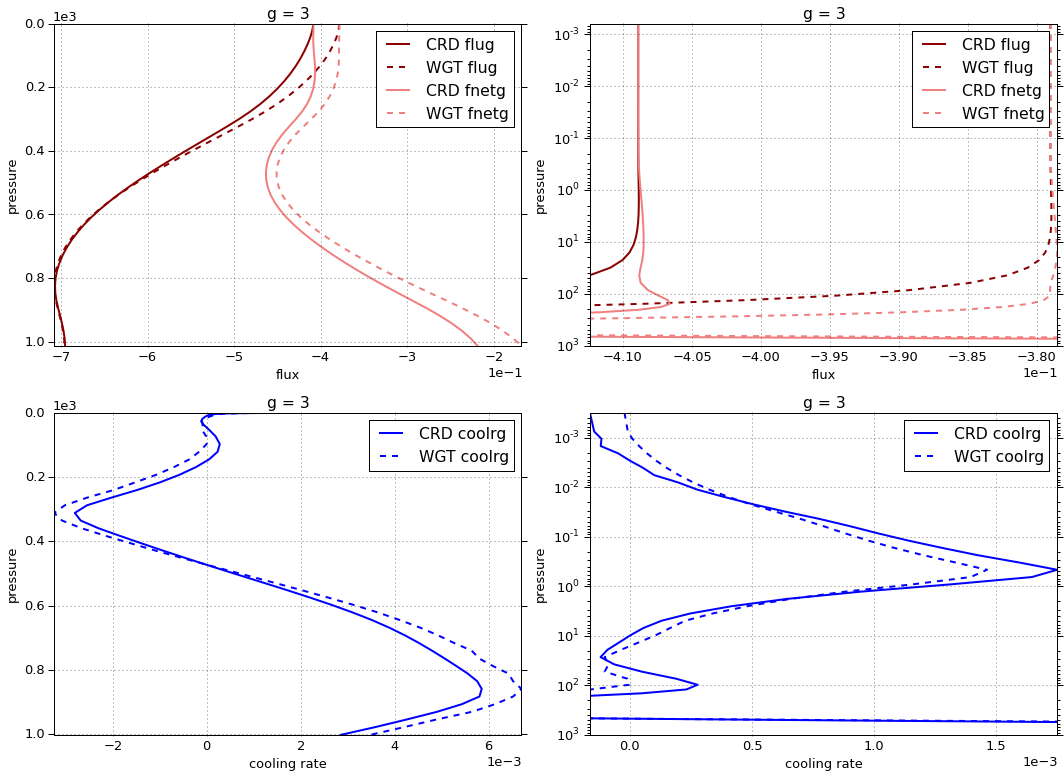

# Figure: flux, cooling rate. g-group 4

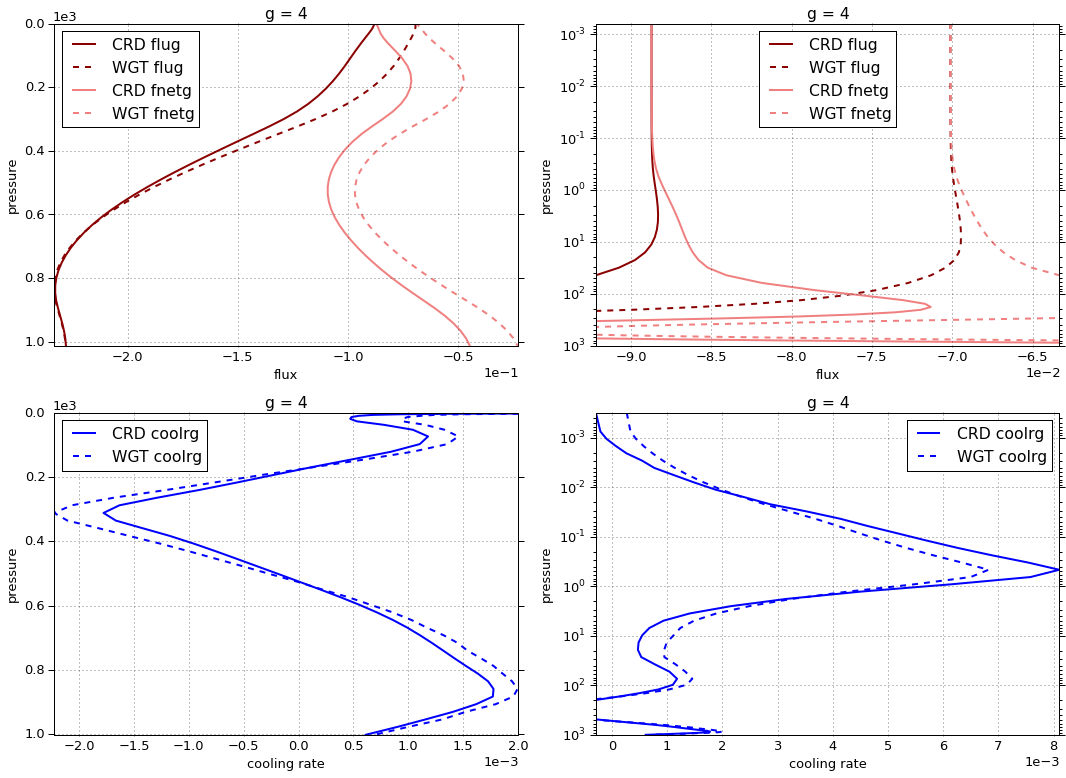

# Figure: flux, cooling rate. g-group 5

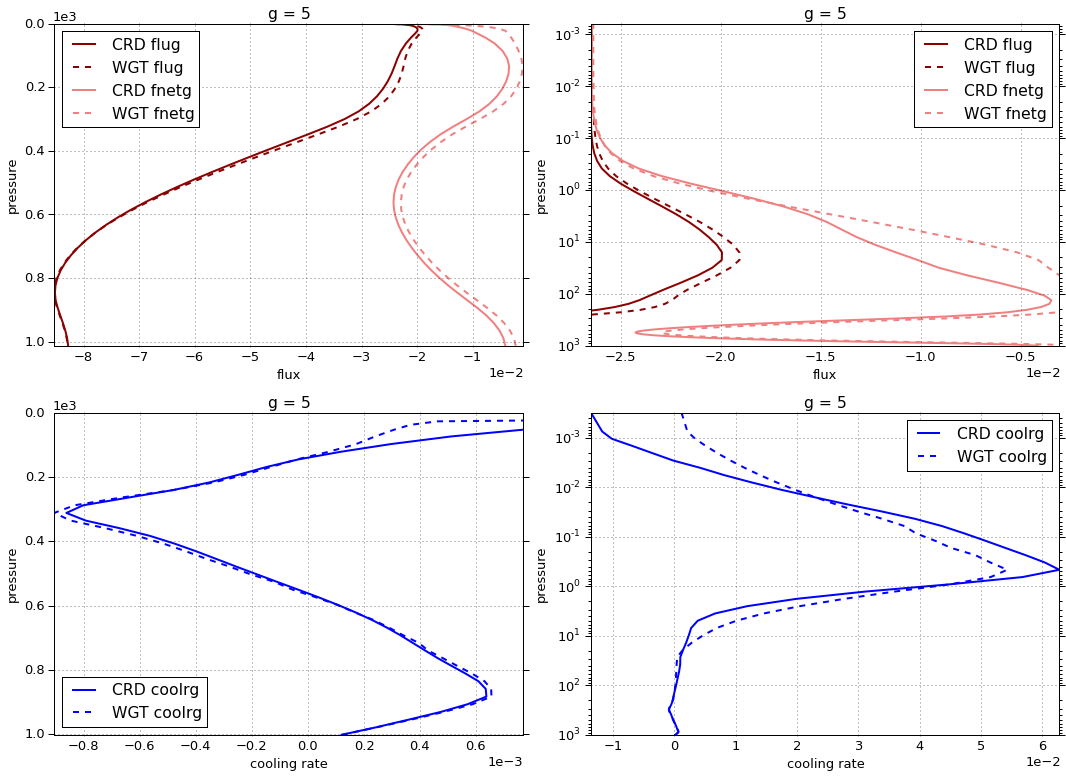

# Figure: flux, cooling rate. g-group total

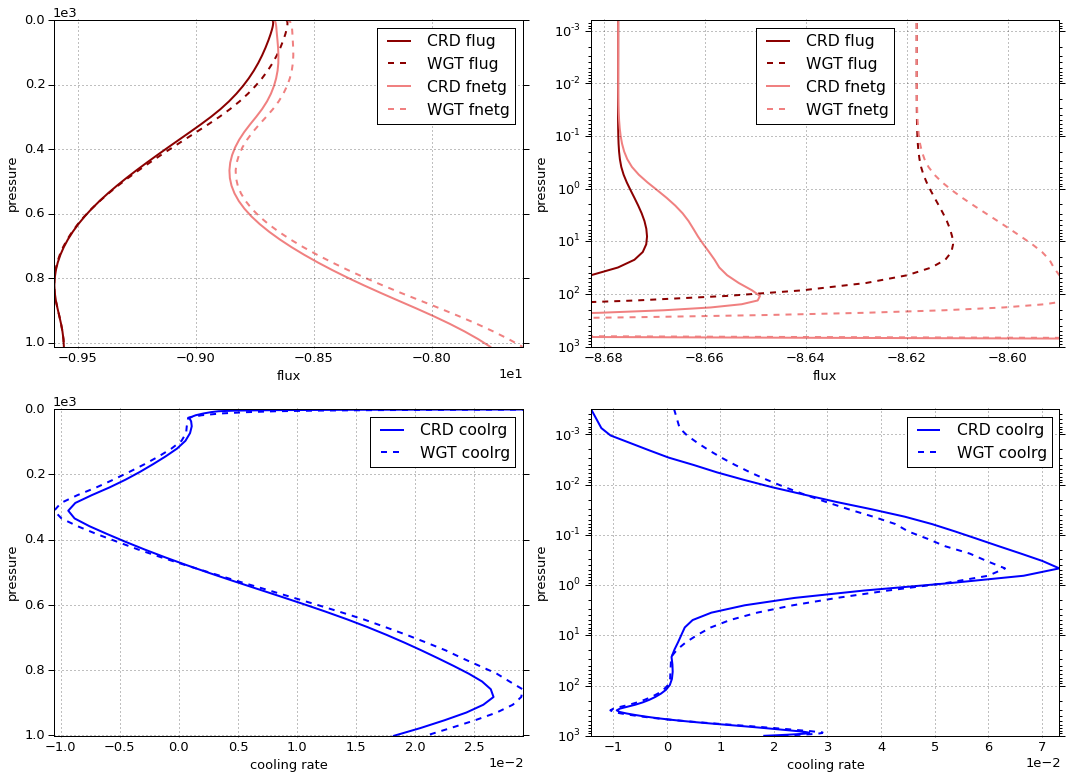

In [25]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [26]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -6.385919  0.000000 -6.385919
  1013     76    -6.459300  0.255123 -6.204177
2 0        1     -1.767138  0.000000 -1.767138
  1013     76    -2.092598  0.813392 -1.279206
3 0        1     -0.408911  0.000000 -0.408911
  1013     76    -0.695363  0.476315 -0.219048
4 0        1     -0.088730  0.000000 -0.088730
  1013     76    -0.227958  0.183136 -0.044822
5 0        1     -0.026465  0.000000 -0.026465
  1013     76    -0.082808  0.078664 -0.004144


WGT


flug      fldg     fnetg
g pressure level                              
1 0        1     -6.382744  0.000000 -6.382744
  1013     76    -6.456327  0.271910 -6.184417
2 0        1     -1.759802  0.000000 -1.759802
  1013     76    -2.094755  0.857968 -1.236787
3 0        1     -0.379003  0.000000 -0.379003
  1013     76    -0.695944  0.527606 -0.168338
4 0        1     -0.070114  0.000000 -0.070114
  1013     76    -0.228119  0.204971 -0.023147
5 0        1     -0.026386  0.000000 -0.026386
  1013     76    -0.082882  0.080628 -0.002254


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.003175  0.000000  0.003175
  1013     76     0.002973  0.016787  0.019760
2 0        1      0.007336  0.000000  0.007336
  1013     76    -0.002157  0.044576  0.042419
3 0        1      0.029907  0.000000  0.029907
  1013     76    -0.000581  0.051290  0.050710
4 0        1      0.018616  0.000000  0.018616
  1013     76    -0.000161  0.021835  0.021675
5 0        1      0.000079  0.000000  0.000079
  1013     76    -0.000075  0.001964  0.001890

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000007
  1001.112500 75     0.004464
2 0.000312    1     -0.000107
  1001.112500 75     0.010138
3 0.000312    1     -0.000164
  1001.112500 75     0.002859
4 0.000312    1     -0.000291
  1001.112500 75     0.000612
5 0.000312    1     -0.013612
  1001.112500 75     0.000121


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000006
  1001.112500 75     0.005216
2 0.000312    1     -0.000065
  1001.112500 75     0.011353
3 0.000312    1     -0.000022
  1001.112500 75     0.003487
4 0.000312    1      0.000268
  1001.112500 75     0.000693
5 0.000312    1      0.001161
  1001.112500 75     0.000122


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1      6.071082e-07
  1001.112500 75     7.513989e-04
2 0.000312    1      4.283665e-05
  1001.112500 75     1.214963e-03
3 0.000312    1      1.417181e-04
  1001.112500 75     6.280128e-04
4 0.000312    1      5.593132e-04
  1001.112500 75     8.087314e-05
5 0.000312    1      1.477344e-02
  1001.112500 75     9.371900e-07

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-8.677163,0.00000,-8.677163
1013,76,-9.558027,1.80663,-7.751397



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-8.618049,0.000000,-8.618049
1013,76,-9.558027,1.943083,-7.614944



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,5.911360e-02,0.000000,0.059114
1013,76,7.700000e-08,0.136453,0.136453


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.014181
1001.112500,75,0.018193



WGT


,,coolrg
pressure,layer,
0.000312,1,0.001336
1001.112500,75,0.020869



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.015518
1001.112500,75,0.002676


In [27]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686000,0.675487
2,0.211758,0.219162
3,0.070636,0.072812
4,0.023212,0.023867
5,0.008394,0.008671


In [28]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      1     1 -6.385919  0.000000e+00 -6.385919   1     1 -6.382744   
0.000624      1     2 -6.385919  2.174871e-10 -6.385919   1     2 -6.382744   
0.000876      1     3 -6.385919  3.142207e-10 -6.385919   1     3 -6.382744   
0.001229      1     4 -6.385919  4.715672e-10 -6.385919   1     4 -6.382744   
0.001723      1     5 -6.385919  7.335829e-10 -6.385919   1     5 -6.382744   
0.002417      1     6 -6.385919  1.170006e-09 -6.385919   1     6 -6.382744   
0.003391      1     7 -6.385919  1.897084e-09 -6.385919   1     7 -6.382744   
0.004757      1     8 -6.385919  3.108304e-09 -6.385919   1     8 -6.382744   
0.006672      1     9 -6.385919  5.125280e-09 -6.385919   1     9 -6.382744   
0.009359      1    10 -6.385919  8.484489e-09 -6.385919   1    10 -6.382744   
0.013128      1    11 -6.385919  1.407985e-08 -6.385919   1    11 -6.382744   
0.018415      1    12 -6.385919  2.340159e-08 -6.385919   1    12 -6.382744   
0.025830      1    13 -6.385919  3.893297e-08 -6.385919   1    13 -6.382744   
0.036232      1    14 -6.385919  6.474175e-08 -6.385919   1    14 -6.382744   
0.050823      1    15 -6.385919  1.068585e-07 -6.385919   1    15 -6.382744   
0.071291      1    16 -6.385919  1.736210e-07 -6.385919   1    16 -6.382744   
0.100000      1    17 -6.385919  2.778233e-07 -6.385919   1    17 -6.382744   
0.140271      1    18 -6.385919  4.402631e-07 -6.385919   1    18 -6.382744   
0.196760      1    19 -6.385919  6.940039e-07 -6.385918   1    19 -6.382744   
0.275997      1    20 -6.385919  1.091506e-06 -6.385918   1    20 -6.382744   
0.387100      1    21 -6.385919  1.715675e-06 -6.385917   1    21 -6.382744   
0.543100      1    22 -6.385919  2.688668e-06 -6.385916   1    22 -6.382744   
0.761700      1    23 -6.385919  3.997738e-06 -6.385915   1    23 -6.382744   
1.068500      1    24 -6.385919  5.516508e-06 -6.385914   1    24 -6.382744   
1.498800      1    25 -6.385920  7.189203e-06 -6.385912   1    25 -6.382745   
2.102400      1    26 -6.385921  9.082232e-06 -6.385912   1    26 -6.382746   
2.949000      1    27 -6.385923  1.132898e-05 -6.385911   1    27 -6.382747   
4.136600      1    28 -6.385926  1.415402e-05 -6.385912   1    28 -6.382751   
5.802500      1    29 -6.385933  1.800936e-05 -6.385915   1    29 -6.382757   
8.139200      1    30 -6.385944  2.378910e-05 -6.385921   1    30 -6.382769   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    1    47 -6.412327  1.064584e-02 -6.401682   1    47 -6.409874   
347.300000    1    48 -6.416033  1.240456e-02 -6.403628   1    48 -6.413622   
371.075000    1    49 -6.419826  1.450400e-02 -6.405322   1    49 -6.417467   
394.850000    1    50 -6.423662  1.698812e-02 -6.406674   1    50 -6.421351   
418.625000    1    51 -6.427501  1.989444e-02 -6.407607   1    51 -6.425206   
442.400000    1    52 -6.431307  2.325730e-02 -6.408050   1    52 -6.429045   
466.175000    1    53 -6.435042  2.710662e-02 -6.407935   1    53 -6.432776   
489.950000    1    54 -6.438669  3.147299e-02 -6.407196   1    54 -6.436418   
513.725000    1    55 -6.442151  3.638513e-02 -6.405766   1    55 -6.439872   
537.500000    1    56 -6.445455  4.186727e-02 -6.403588   1    56 -6.443169   
561.275000    1    57 -6.448548  4.793635e-02 -6.400611   1    57 -6.446225   
585.050000    1    58 -6.451402  5.460529e-02 -6.396796   1    58 -6.449052   
608.825000    1    59 -6.453994  6.187900e-02 -6.392115   1    59 -6.451607   
632.600000    1    60 -6.456307  6.975711e-02 -6.386550   1    60 -6.453875   
656.375000    1    61 -6.458329  7.823028e-02 -6.380098   1    61 -6.455844   
680.150000    1    62 -6.460052  8.728175e-02 -6.372770   1    62 -6.457504   
703.925000    1    63 -6.461472  9.689249e-02 -6.364579   1   

In [29]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -1.767138  0.000000e+00 -1.767138   2     1 -1.759802   
0.000624      2     2 -1.767138  4.118759e-09 -1.767138   2     2 -1.759802   
0.000876      2     3 -1.767138  5.915769e-09 -1.767138   2     3 -1.759802   
0.001229      2     4 -1.767138  8.726769e-09 -1.767138   2     4 -1.759802   
0.001723      2     5 -1.767139  1.322699e-08 -1.767138   2     5 -1.759802   
0.002417      2     6 -1.767139  2.043383e-08 -1.767138   2     6 -1.759802   
0.003391      2     7 -1.767139  3.197872e-08 -1.767138   2     7 -1.759802   
0.004757      2     8 -1.767139  5.047368e-08 -1.767139   2     8 -1.759802   
0.006672      2     9 -1.767139  8.009518e-08 -1.767139   2     9 -1.759802   
0.009359      2    10 -1.767139  1.275500e-07 -1.767139   2    10 -1.759802   
0.013128      2    11 -1.767139  2.035943e-07 -1.767138   2    11 -1.759802   
0.018415      2    12 -1.767139  3.254897e-07 -1.767138   2    12 -1.759803   
0.025830      2    13 -1.767139  5.209235e-07 -1.767138   2    13 -1.759803   
0.036232      2    14 -1.767139  8.334991e-07 -1.767138   2    14 -1.759803   
0.050823      2    15 -1.767139  1.326533e-06 -1.767138   2    15 -1.759803   
0.071291      2    16 -1.767139  2.087342e-06 -1.767137   2    16 -1.759803   
0.100000      2    17 -1.767139  3.246574e-06 -1.767136   2    17 -1.759803   
0.140271      2    18 -1.767139  5.009534e-06 -1.767134   2    18 -1.759802   
0.196760      2    19 -1.767139  7.693360e-06 -1.767131   2    19 -1.759802   
0.275997      2    20 -1.767139  1.178528e-05 -1.767127   2    20 -1.759801   
0.387100      2    21 -1.767138  1.802750e-05 -1.767120   2    21 -1.759800   
0.543100      2    22 -1.767136  2.747683e-05 -1.767109   2    22 -1.759798   
0.761700      2    23 -1.767134  4.014100e-05 -1.767094   2    23 -1.759796   
1.068500      2    24 -1.767134  5.522757e-05 -1.767078   2    24 -1.759794   
1.498800      2    25 -1.767136  7.223084e-05 -1.767064   2    25 -1.759794   
2.102400      2    26 -1.767143  9.153849e-05 -1.767051   2    26 -1.759798   
2.949000      2    27 -1.767157  1.140328e-04 -1.767043   2    27 -1.759808   
4.136600      2    28 -1.767183  1.412380e-04 -1.767042   2    28 -1.759827   
5.802500      2    29 -1.767228  1.763167e-04 -1.767052   2    29 -1.759864   
8.139200      2    30 -1.767306  2.254899e-04 -1.767081   2    30 -1.759930   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -1.884898  5.684686e-02 -1.828051   2    47 -1.884050   
347.300000    2    48 -1.901658  6.518089e-02 -1.836477   2    48 -1.901439   
371.075000    2    49 -1.918626  7.492598e-02 -1.843700   2    49 -1.918990   
394.850000    2    50 -1.935590  8.621644e-02 -1.849373   2    50 -1.936483   
418.625000    2    51 -1.952394  9.911710e-02 -1.853277   2    51 -1.953763   
442.400000    2    52 -1.968898  1.136800e-01 -1.855218   2    52 -1.970642   
466.175000    2    53 -1.984960  1.299427e-01 -1.855017   2    53 -1.987113   
489.950000    2    54 -2.000443  1.479339e-01 -1.852509   2    54 -2.002935   
513.725000    2    55 -2.015217  1.676627e-01 -1.847555   2    55 -2.018001   
537.500000    2    56 -2.029160  1.891243e-01 -1.840036   2    56 -2.032158   
561.275000    2    57 -2.042162  2.122882e-01 -1.829874   2    57 -2.045314   
585.050000    2    58 -2.054134  2.371032e-01 -1.817031   2    58 -2.057399   
608.825000    2    59 -2.065003  2.634933e-01 -1.801510   2    59 -2.068314   
632.600000    2    60 -2.074723  2.913588e-01 -1.783364   2    60 -2.078050   
656.375000    2    61 -2.083263  3.205789e-01 -1.762685   2    61 -2.086561   
680.150000    2    62 -2.090611  3.510193e-01 -1.739592   2    62 -2.093834   
703.925000    2    63 -2.096763  3.825429e-01 -1.714220   2   

In [30]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.408911  0.000000e+00 -0.408911   3     1 -0.379003   
0.000624      3     2 -0.408911  1.068164e-08 -0.408911   3     2 -0.379003   
0.000876      3     3 -0.408911  1.534963e-08 -0.408911   3     3 -0.379003   
0.001229      3     4 -0.408911  2.267016e-08 -0.408911   3     4 -0.379003   
0.001723      3     5 -0.408911  3.441939e-08 -0.408911   3     5 -0.379003   
0.002417      3     6 -0.408911  5.327654e-08 -0.408911   3     6 -0.379003   
0.003391      3     7 -0.408911  8.353988e-08 -0.408911   3     7 -0.379003   
0.004757      3     8 -0.408911  1.320910e-07 -0.408911   3     8 -0.379003   
0.006672      3     9 -0.408911  2.099262e-07 -0.408911   3     9 -0.379003   
0.009359      3    10 -0.408911  3.346826e-07 -0.408911   3    10 -0.379003   
0.013128      3    11 -0.408911  5.345938e-07 -0.408910   3    11 -0.379003   
0.018415      3    12 -0.408911  8.548571e-07 -0.408910   3    12 -0.379003   
0.025830      3    13 -0.408911  1.367740e-06 -0.408910   3    13 -0.379003   
0.036232      3    14 -0.408911  2.186596e-06 -0.408909   3    14 -0.379003   
0.050823      3    15 -0.408911  3.475488e-06 -0.408908   3    15 -0.379003   
0.071291      3    16 -0.408911  5.460373e-06 -0.408905   3    16 -0.379002   
0.100000      3    17 -0.408910  8.478316e-06 -0.408902   3    17 -0.379001   
0.140271      3    18 -0.408910  1.305673e-05 -0.408897   3    18 -0.379000   
0.196760      3    19 -0.408908  2.000685e-05 -0.408888   3    19 -0.378997   
0.275997      3    20 -0.408905  3.056866e-05 -0.408875   3    20 -0.378994   
0.387100      3    21 -0.408900  4.661941e-05 -0.408854   3    21 -0.378988   
0.543100      3    22 -0.408892  7.081435e-05 -0.408821   3    22 -0.378978   
0.761700      3    23 -0.408882  1.032001e-04 -0.408779   3    23 -0.378966   
1.068500      3    24 -0.408873  1.418334e-04 -0.408731   3    24 -0.378952   
1.498800      3    25 -0.408868  1.852709e-04 -0.408683   3    25 -0.378940   
2.102400      3    26 -0.408871  2.341994e-04 -0.408636   3    26 -0.378931   
2.949000      3    27 -0.408885  2.904286e-04 -0.408595   3    27 -0.378928   
4.136600      3    28 -0.408917  3.571640e-04 -0.408560   3    28 -0.378937   
5.802500      3    29 -0.408976  4.415941e-04 -0.408534   3    29 -0.378965   
8.139200      3    30 -0.409077  5.581233e-04 -0.408519   3    30 -0.379024   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -0.508462  7.179220e-02 -0.436670   3    47 -0.495353   
347.300000    3    48 -0.523177  7.895250e-02 -0.444225   3    48 -0.511994   
371.075000    3    49 -0.538053  8.733467e-02 -0.450719   3    49 -0.528661   
394.850000    3    50 -0.552864  9.694123e-02 -0.455923   3    50 -0.545173   
418.625000    3    51 -0.567490  1.076867e-01 -0.459804   3    51 -0.561358   
442.400000    3    52 -0.581819  1.194950e-01 -0.462324   3    52 -0.577107   
466.175000    3    53 -0.595738  1.322910e-01 -0.463447   3    53 -0.592300   
489.950000    3    54 -0.609142  1.460014e-01 -0.463141   3    54 -0.606827   
513.725000    3    55 -0.621926  1.605439e-01 -0.461382   3    55 -0.620576   
537.500000    3    56 -0.633995  1.758371e-01 -0.458158   3    56 -0.633463   
561.275000    3    57 -0.645263  1.917898e-01 -0.453473   3    57 -0.645408   
585.050000    3    58 -0.655661  2.082935e-01 -0.447368   3    58 -0.656352   
608.825000    3    59 -0.665139  2.252380e-01 -0.439901   3    59 -0.666258   
632.600000    3    60 -0.673664  2.425011e-01 -0.431163   3    60 -0.675096   
656.375000    3    61 -0.681224  2.599664e-01 -0.421258   3    61 -0.682862   
680.150000    3    62 -0.687817  2.775094e-01 -0.410307   3    62 -0.689560   
703.925000    3    63 -0.693448  2.950254e-01 -0.398423   3   

In [31]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.088730  0.000000e+00 -0.088730   4     1 -0.070114   
0.000624      4     2 -0.088730  4.566697e-08 -0.088730   4     2 -0.070114   
0.000876      4     3 -0.088730  6.571972e-08 -0.088730   4     3 -0.070114   
0.001229      4     4 -0.088730  9.743212e-08 -0.088730   4     4 -0.070114   
0.001723      4     5 -0.088731  1.487022e-07 -0.088730   4     5 -0.070114   
0.002417      4     6 -0.088731  2.314794e-07 -0.088730   4     6 -0.070114   
0.003391      4     7 -0.088731  3.649368e-07 -0.088730   4     7 -0.070114   
0.004757      4     8 -0.088731  5.797351e-07 -0.088730   4     8 -0.070114   
0.006672      4     9 -0.088731  9.247465e-07 -0.088730   4     9 -0.070114   
0.009359      4    10 -0.088731  1.478057e-06 -0.088729   4    10 -0.070114   
0.013128      4    11 -0.088731  2.364027e-06 -0.088729   4    11 -0.070114   
0.018415      4    12 -0.088731  3.780456e-06 -0.088727   4    12 -0.070113   
0.025830      4    13 -0.088731  6.041128e-06 -0.088725   4    13 -0.070112   
0.036232      4    14 -0.088730  9.633456e-06 -0.088720   4    14 -0.070111   
0.050823      4    15 -0.088728  1.525680e-05 -0.088713   4    15 -0.070109   
0.071291      4    16 -0.088726  2.386865e-05 -0.088702   4    16 -0.070105   
0.100000      4    17 -0.088721  3.688255e-05 -0.088684   4    17 -0.070099   
0.140271      4    18 -0.088713  5.647954e-05 -0.088657   4    18 -0.070090   
0.196760      4    19 -0.088701  8.596001e-05 -0.088615   4    19 -0.070075   
0.275997      4    20 -0.088681  1.302569e-04 -0.088550   4    20 -0.070053   
0.387100      4    21 -0.088648  1.966687e-04 -0.088451   4    21 -0.070018   
0.543100      4    22 -0.088597  2.951168e-04 -0.088302   4    22 -0.069965   
0.761700      4    23 -0.088530  4.247648e-04 -0.088105   4    23 -0.069896   
1.068500      4    24 -0.088459  5.766222e-04 -0.087882   4    24 -0.069815   
1.498800      4    25 -0.088395  7.423661e-04 -0.087652   4    25 -0.069733   
2.102400      4    26 -0.088346  9.202710e-04 -0.087426   4    26 -0.069652   
2.949000      4    27 -0.088322  1.112342e-03 -0.087210   4    27 -0.069576   
4.136600      4    28 -0.088334  1.322675e-03 -0.087011   4    28 -0.069513   
5.802500      4    29 -0.088395  1.568316e-03 -0.086827   4    29 -0.069467   
8.139200      4    30 -0.088524  1.885163e-03 -0.086639   4    30 -0.069452   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.135924  4.663746e-02 -0.089286   4    47 -0.123079   
347.300000    4    48 -0.143124  4.914715e-02 -0.093977   4    48 -0.131825   
371.075000    4    49 -0.150406  5.242835e-02 -0.097978   4    49 -0.140556   
394.850000    4    50 -0.157631  5.634527e-02 -0.101286   4    50 -0.149194   
418.625000    4    51 -0.164740  6.075763e-02 -0.103983   4    51 -0.157600   
442.400000    4    52 -0.171687  6.557357e-02 -0.106113   4    52 -0.165738   
466.175000    4    53 -0.178422  7.072280e-02 -0.107699   4    53 -0.173567   
489.950000    4    54 -0.184899  7.615077e-02 -0.108748   4    54 -0.181027   
513.725000    4    55 -0.191068  8.181116e-02 -0.109257   4    55 -0.188077   
537.500000    4    56 -0.196888  8.765369e-02 -0.109234   4    56 -0.194659   
561.275000    4    57 -0.202320  9.363821e-02 -0.108682   4    57 -0.200751   
585.050000    4    58 -0.207331  9.971650e-02 -0.107615   4    58 -0.206309   
608.825000    4    59 -0.211902  1.058447e-01 -0.106058   4    59 -0.211361   
632.600000    4    60 -0.216021  1.119728e-01 -0.104048   4    60 -0.215859   
656.375000    4    61 -0.219684  1.180597e-01 -0.101624   4    61 -0.219813   
680.150000    4    62 -0.222895  1.240640e-01 -0.098831   4    62 -0.223246   
703.925000    4    63 -0.225661  1.299505e-01 -0.095711   4   

In [32]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -0.026465  0.000000e+00 -0.026465   5     1 -0.026386   
0.000624      5     2 -0.026466  8.537800e-07 -0.026466   5     2 -0.026386   
0.000876      5     3 -0.026467  1.221513e-06 -0.026466   5     3 -0.026386   
0.001229      5     4 -0.026468  1.781385e-06 -0.026466   5     4 -0.026387   
0.001723      5     5 -0.026469  2.652287e-06 -0.026467   5     5 -0.026387   
0.002417      5     6 -0.026471  4.005090e-06 -0.026467   5     6 -0.026387   
0.003391      5     7 -0.026473  6.103280e-06 -0.026467   5     7 -0.026387   
0.004757      5     8 -0.026476  9.351499e-06 -0.026466   5     8 -0.026387   
0.006672      5     9 -0.026479  1.436859e-05 -0.026464   5     9 -0.026387   
0.009359      5    10 -0.026483  2.210288e-05 -0.026460   5    10 -0.026386   
0.013128      5    11 -0.026487  3.400001e-05 -0.026453   5    11 -0.026385   
0.018415      5    12 -0.026491  5.225544e-05 -0.026438   5    12 -0.026382   
0.025830      5    13 -0.026494  8.018233e-05 -0.026414   5    13 -0.026375   
0.036232      5    14 -0.026495  1.226277e-04 -0.026372   5    14 -0.026365   
0.050823      5    15 -0.026490  1.863224e-04 -0.026304   5    15 -0.026346   
0.071291      5    16 -0.026478  2.802094e-04 -0.026198   5    16 -0.026314   
0.100000      5    17 -0.026454  4.164331e-04 -0.026037   5    17 -0.026268   
0.140271      5    18 -0.026408  6.126370e-04 -0.025796   5    18 -0.026194   
0.196760      5    19 -0.026327  8.930411e-04 -0.025434   5    19 -0.026083   
0.275997      5    20 -0.026187  1.290683e-03 -0.024896   5    20 -0.025903   
0.387100      5    21 -0.025948  1.847144e-03 -0.024101   5    21 -0.025637   
0.543100      5    22 -0.025549  2.608848e-03 -0.022941   5    22 -0.025231   
0.761700      5    23 -0.024997  3.526865e-03 -0.021470   5    23 -0.024681   
1.068500      5    24 -0.024333  4.494366e-03 -0.019838   5    24 -0.024019   
1.498800      5    25 -0.023628  5.374322e-03 -0.018254   5    25 -0.023292   
2.102400      5    26 -0.022917  6.084674e-03 -0.016833   5    26 -0.022533   
2.949000      5    27 -0.022228  6.587472e-03 -0.015640   5    27 -0.021771   
4.136600      5    28 -0.021600  6.894816e-03 -0.014706   5    28 -0.021051   
5.802500      5    29 -0.021063  7.109863e-03 -0.013953   5    29 -0.020411   
8.139200      5    30 -0.020601  7.405544e-03 -0.013196   5    30 -0.019852   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -0.036126  2.262073e-02 -0.013505   5    47 -0.034081   
347.300000    5    48 -0.039554  2.381514e-02 -0.015739   5    48 -0.037698   
371.075000    5    49 -0.043089  2.545862e-02 -0.017631   5    49 -0.041414   
394.850000    5    50 -0.046619  2.740019e-02 -0.019219   5    50 -0.045128   
418.625000    5    51 -0.050113  2.955105e-02 -0.020562   5    51 -0.048799   
442.400000    5    52 -0.053547  3.185841e-02 -0.021688   5    52 -0.052410   
466.175000    5    53 -0.056896  3.428416e-02 -0.022612   5    53 -0.055935   
489.950000    5    54 -0.060135  3.679926e-02 -0.023336   5    54 -0.059330   
513.725000    5    55 -0.063236  3.938246e-02 -0.023853   5    55 -0.062584   
537.500000    5    56 -0.066177  4.201198e-02 -0.024165   5    56 -0.065644   
561.275000    5    57 -0.068936  4.466806e-02 -0.024268   5    57 -0.068555   
585.050000    5    58 -0.071497  4.733042e-02 -0.024166   5    58 -0.071225   
608.825000    5    59 -0.073845  4.997599e-02 -0.023869   5    59 -0.073674   
632.600000    5    60 -0.075974  5.258479e-02 -0.023389   5    60 -0.075892   
656.375000    5    61 -0.077881  5.513824e-02 -0.022743   5    61 -0.077872   
680.150000    5    62 -0.079567  5.761944e-02 -0.021947   5    62 -0.079615   
703.925000    5    63 -0.081035  6.001879e-02 -0.021016   5   

In [33]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')